## Part 1
We want to calculate the 95% confidence interval for p: 
$$
  P(\hat{p}-a < p < \hat{p} +a)=0.95

  =P(-a < \hat{p}-p < +a)
  =P(\frac{-a}{(\frac{\sigma}{\sqrt{n}})}< z < \frac{+a}{(\frac{\sigma}{\sqrt{n}})})
$$
because now z follows the guassian distribution we can use guassion CDF to calculate the probability.
$$
  =2.p(z<\frac{+a}{(\frac{\sigma}{\sqrt{n}})})-1\\

  =2. \phi(\frac{+a}{\frac{\sigma}{\sqrt{n}}})-1 = 0.95\\

  =\phi(\frac{+a}{\frac{\sigma}{\sqrt{n}}})=\frac {1.95}{2} 
$$ 
Now we can use ppf to calculate a value since we have $\sigma=\sqrt{p*(1-p)}$ and n values.
so the confidence interval will be:
$$ \hat{p} -\frac {\sigma}{\sqrt{n}} . z_{(1+0.95)/2} < p < \hat{p} +\frac {\sigma}{\sqrt{n}} . z_{(1+0.95)/2}


## Part 2

In [174]:
import pandas as pd
import numpy as np
from scipy.stats import norm,binom
import random
import matplotlib.pyplot as plt

In [175]:
p=0.47
CI_start=p -norm.ppf(.975)* np.sqrt(p*(1-p)/30)
CI_end=p +norm.ppf(.975)* np.sqrt(p*(1-p)/30)
print(CI_start,CI_end)


0.2914029309465105 0.6485970690534895


In [176]:
N=30
p=0.47
expriment_count=10**5
votes = np.random.binomial(N, p,expriment_count)
democrat_porportion = votes/N
votes_in_CI = votes[(democrat_porportion > CI_start) & (democrat_porportion < CI_end)]
print(len(votes_in_CI)/len(votes))

0.95739


As you can see about 95% of data is in the 95% confidence interval

## Part 3

In [177]:
df = pd.read_csv("2016-general-election-trump-vs-clinton.csv")
df = df[df["Population"].isin(["Likely Voters","Registered Voters"])]
df = df.dropna(subset=["Number of Observations"])
time_df=df[["Trump","Clinton","Pollster","Start Date","Number of Observations","Mode"]]

time_df.head()

,Trump,Clinton,Pollster,Start Date,Number of Observations,Mode
0,41.0,45.0,Insights West,2016-11-04,940.0,Internet
4,43.0,41.0,IBD/TIPP,2016-11-04,1107.0,Live Phone
5,41.0,45.0,YouGov/Economist,2016-11-04,3669.0,Internet
9,40.0,45.0,Lucid/The Times-Picayune,2016-11-04,931.0,Internet
10,43.0,46.0,Bloomberg/Selzer,2016-11-04,799.0,Live Phone


## Part 4

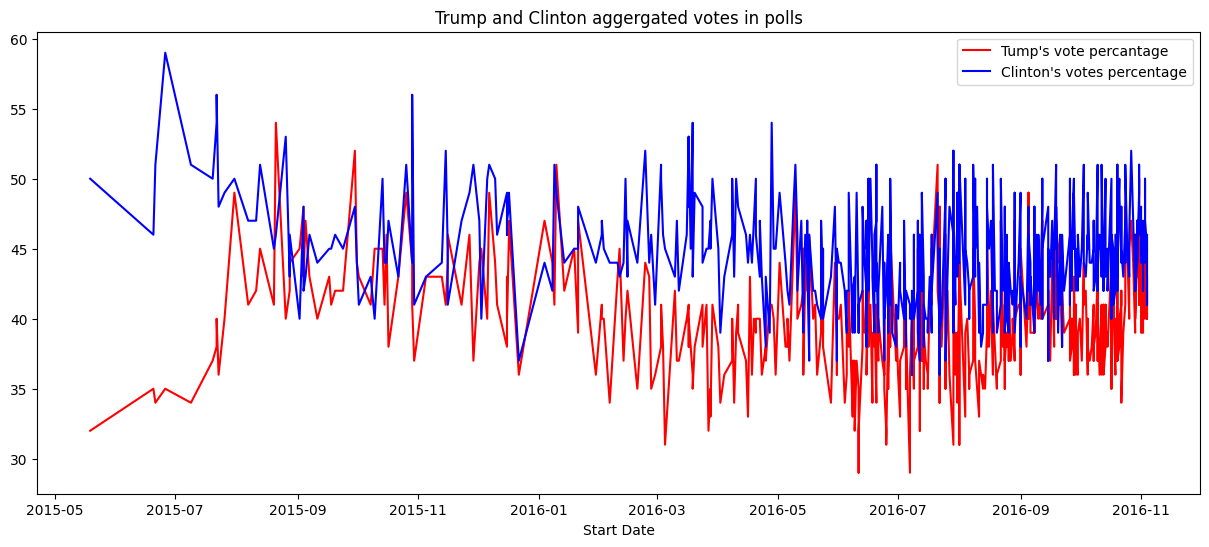

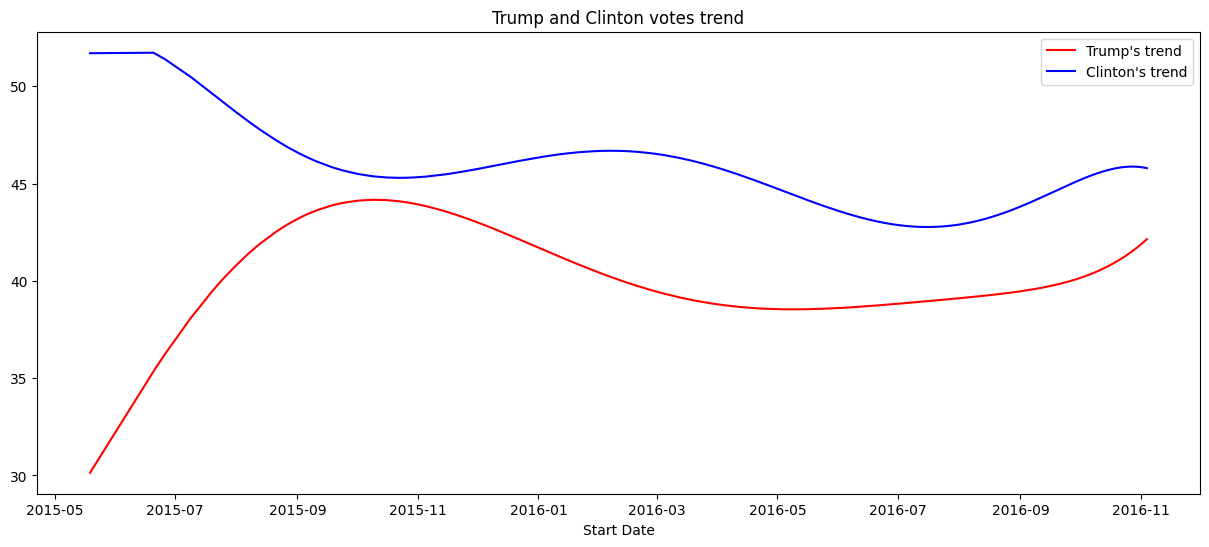

In [178]:
time_df_copy=time_df.copy()
time_df_copy['Start Date'] =pd.to_datetime(time_df['Start Date'])
time_df=time_df_copy
time_df_sorted = time_df.sort_values(by="Start Date")


plt.figure(figsize=(15, 6)) 
plt.plot(time_df_sorted["Start Date"],time_df_sorted["Trump"],color="red",label="Tump's vote percantage")
plt.plot(time_df_sorted["Start Date"],time_df_sorted["Clinton"],color="blue",label="Clinton's votes percentage")
plt.xlabel("Start Date")
plt.title("Trump and Clinton aggergated votes in polls")
plt.legend()
plt.show()

plt.figure(figsize=(15, 6)) 
time_numeric = (time_df_sorted['Start Date']- time_df_sorted['Start Date'].min()).dt.days
coefficients_trump = np.polyfit(time_numeric, time_df_sorted["Trump"], 6)  
coefficients_clinton = np.polyfit(time_numeric, time_df_sorted["Clinton"], 6)
trend_line_clinton = np.polyval(coefficients_clinton, time_numeric)
trend_line_trump = np.polyval(coefficients_trump, time_numeric)
plt.plot(time_df_sorted["Start Date"],trend_line_trump, label="Trump's trend",color="red")
plt.plot(time_df_sorted["Start Date"],trend_line_clinton, label="Clinton's trend",color="blue")
plt.title("Trump and Clinton votes trend")
plt.xlabel("Start Date")
plt.legend()

## Part 5&6

In [179]:
total_votes=sum(df["Number of Observations"])
print(f"Total vote observations: {total_votes}")
df["Clinton Votes"]=df["Number of Observations"] *df["Clinton"]/100
df["Trump Votes"]=df["Number of Observations"] *df["Trump"]/100
total_trump_votes=np.sum(df["Trump Votes"])
total_clinton_votes=np.sum(df["Clinton Votes"])
other_votes=total_votes-total_trump_votes-total_clinton_votes
vote_counts={
  "Name":["Total","Trump","Clinton","Others"],
  "Vote Count":[total_votes,total_trump_votes,total_clinton_votes,other_votes],
  "Vote Percentage":[1,(total_trump_votes/total_votes),(total_clinton_votes/total_votes),other_votes/total_votes]
}
votes_count_df=pd.DataFrame(vote_counts)
print(votes_count_df)


Total vote observations: 1683197.0
      Name  Vote Count  Vote Percentage
0    Total  1683197.00         1.000000
1    Trump   686524.90         0.407870
2  Clinton   771950.71         0.458622
3   Others   224721.39         0.133509


## Part 7

In [180]:
p_hat_trump=total_trump_votes/total_votes
CI_start_trump=p_hat_trump-norm.ppf(0.975)*np.sqrt(p_hat_trump*(1-p_hat_trump)/total_votes)
CI_end_trump=p_hat_trump+norm.ppf(0.975)*np.sqrt(p_hat_trump*(1-p_hat_trump)/total_votes)
p_hat_clinton=total_clinton_votes/total_votes
print(f"Trump's confidence interval: ({CI_start_trump}:{CI_end_trump})")
CI_start_clinton=p_hat_clinton-norm.ppf(0.975)*np.sqrt(p_hat_clinton*(1-p_hat_clinton)/total_votes)
CI_end_clinton=p_hat_clinton+norm.ppf(0.975)*np.sqrt(p_hat_clinton*(1-p_hat_clinton)/total_votes)
print(f"Clinton's confidence interval: ({CI_start_clinton}:{CI_end_clinton})")


Trump's confidence interval: (0.40712718713944845:0.4086120281752175)
Clinton's confidence interval: (0.4578689608849975:0.4593744871487144)


## Part 8


In [181]:
d_hat=2*p_hat_clinton-1
SE_p_hat_clinton=(np.sqrt(p_hat_clinton*(1-p_hat_clinton)/total_clinton_votes))
CI_d_start=d_hat-1.96*2*(SE_p_hat_clinton)
CI_d_end=(2*p_hat_clinton-1)+1.96*2*(SE_p_hat_clinton)
print(f"Spread 95% Confidence interval: ({CI_d_start},{CI_d_end})") 
p_value_d_hat=2*(1-norm.cdf(-1*d_hat/(2*SE_p_hat_clinton)))
if  p_value_d_hat > 0.05:
  print("failed to reject H\u2080 ,so there is no significant difference.")
if p_value_d_hat<0.05:
  print("Rejected H\u2080 ,so there is significant difference between spread and 0")
  

Spread 95% Confidence interval: (-0.08497970318896338,-0.08053340074361275)
Rejected H₀ ,so there is significant difference between spread and 0


For hypothesis Testing using confidence interval since d=0 is not in the confidence interval it rejects $H_{0}$ and shows there is a significant difference between 0 and spread of the data.

with p-value testing we should calculate it from both side. So we calculate:
$$
  P(d> \lvert \hat{d} \rvert  \text{ or } d < -\lvert \hat{d} \rvert \: | \: \mu=0) 
$$
which will be calculated by Z_score and turning to normal distribution.
$$
  2 . (1-P(\frac{\lvert d \rvert}{2. SE_{\hat{p}}})) \\
  = 2 . (1- \phi (\frac{\lvert d \rvert}{2. SE_{\hat{p}}}))
$$
